# Movie Genre Classifier: Data Analysing and Cleaning

## Importing Dependincies

In [1]:
import pandas as pd
import numpy as np
import nltk
import re
import matplotlib.pyplot as plt
import seaborn as sns
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from sklearn.preprocessing import LabelEncoder

## Loading the data into envoriment

In [2]:
data = pd.read_csv('./datasets/data.txt', sep=" ::: ", index_col=0,) # Loading train data (id column as index)

C:\Users\gulse\AppData\Local\Temp\ipykernel_8860\3659510723.py:1: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  data = pd.read_csv('./datasets/data.txt', sep=" ::: ", index_col=0,) # Loading train data (id column as index)


In [3]:
data.head() # Looking through first 5 col of train set

,title,genre,description
id,,,
1,Oscar et la dame rose (2009),drama,Listening in to a conversation between his doc...
2,Cupid (1997),thriller,A brother and sister with a past incestuous re...
3,"Young, Wild and Wonderful (1980)",adult,As the bus empties the students for their fiel...
4,The Secret Sin (1915),drama,To help their unemployed father make ends meet...
5,The Unrecovered (2007),drama,The film's title refers not only to the un-rec...


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 54213 entries, 1 to 54213
Data columns (total 3 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   title        54213 non-null  object
 1   genre        54213 non-null  object
 2   description  54213 non-null  object
dtypes: object(3)
memory usage: 1.7+ MB


In [5]:
data.describe().T # Looking basic description of columns

,count,unique,top,freq
title,54213,54213,Oscar et la dame rose (2009),1
genre,54213,27,drama,13613
description,54213,54085,Grammy - music award of the American academy o...,12


In [6]:
data.isna().any().any() # Checking for Null values.

False

## Visualization of Genre Disturibution

C:\Users\gulse\AppData\Local\Temp\ipykernel_12560\2704140798.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=genre_counts.index, y=genre_counts.values, palette='viridis')


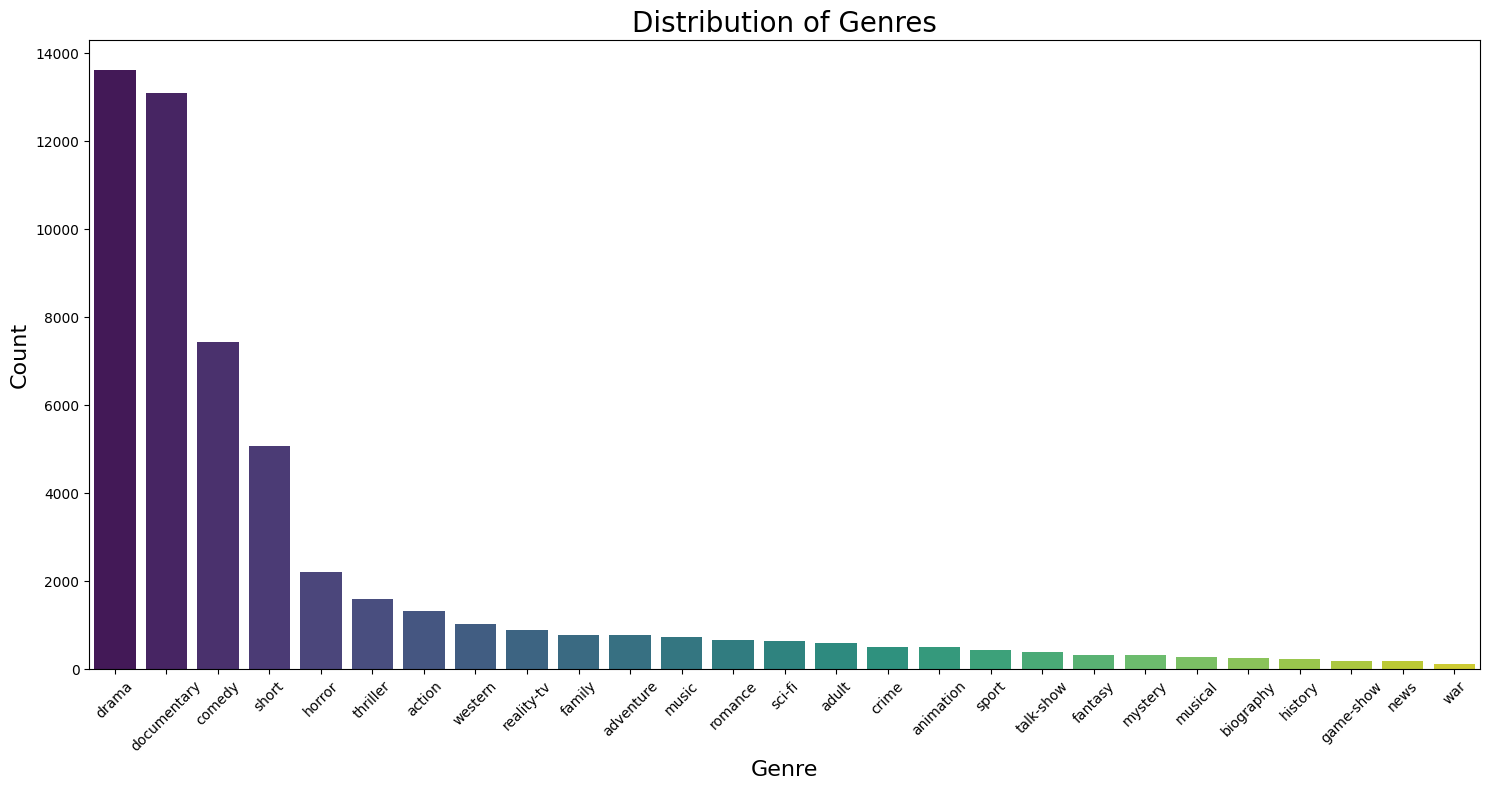

<Figure size 640x480 with 0 Axes>

In [29]:
plt.figure(figsize=(15,8)) # Setting the figure.

# Countplot for genres
genre_counts = data["genre"].value_counts()
sns.barplot(x=genre_counts.index, y=genre_counts.values, palette='viridis')

# Plot Features
plt.title('Distribution of Genres', fontsize=20)
plt.xlabel('Genre', fontsize=16)
plt.ylabel('Count', fontsize=16)
plt.xticks(rotation=45)
plt.tight_layout()

# Show the plot
plt.show()
plt.savefig("./visualizations/Distribution_of_Genres.png")

Text(0, 0.5, 'Count')

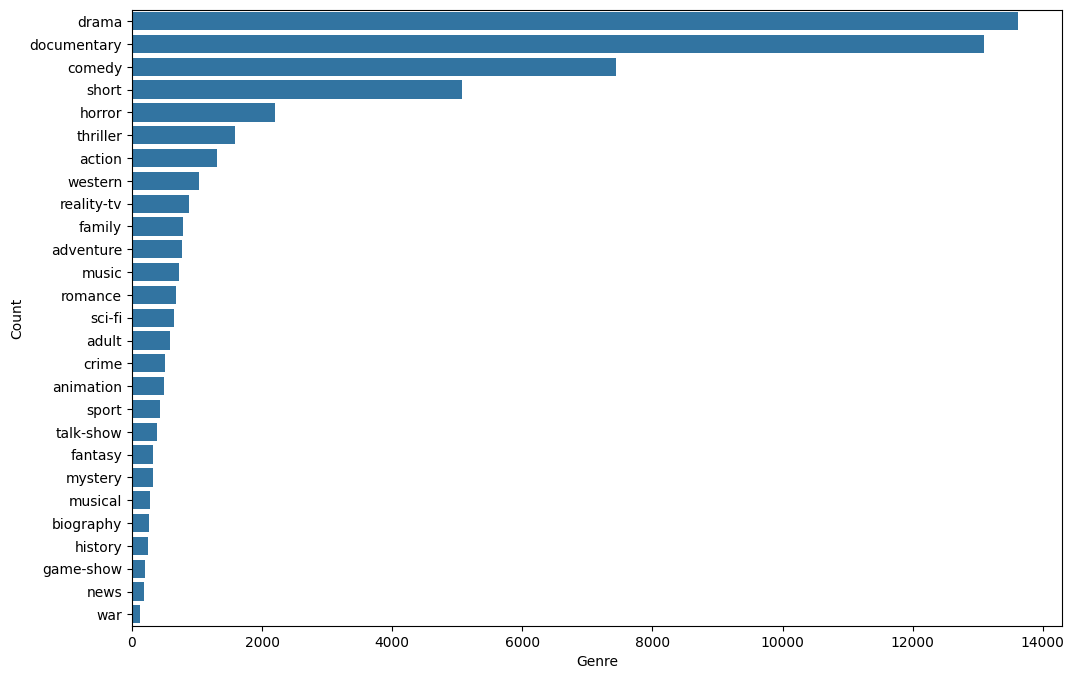

In [9]:
plt.figure(figsize=(12,8))
counts = data.genre.value_counts()
sns.barplot(x=counts, y=counts.index, orient='h')  
plt.xlabel('Genre')
plt.ylabel('Count')

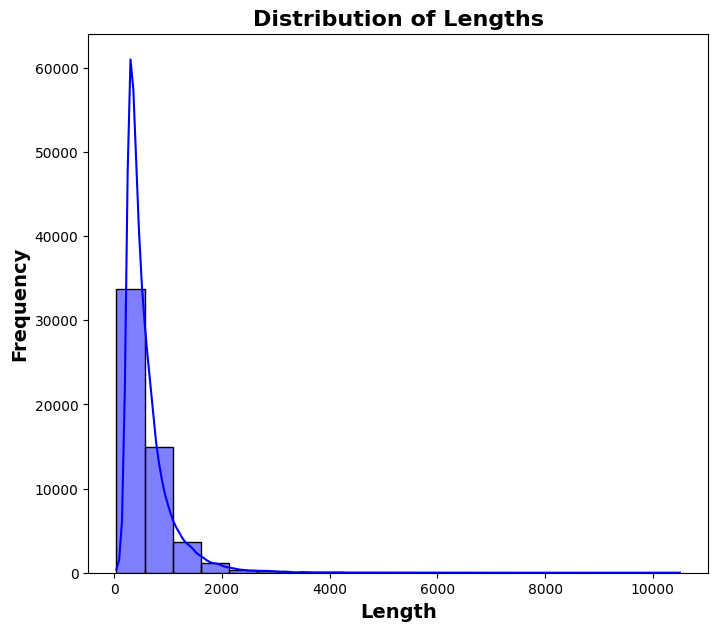

In [12]:
plt.figure(figsize=(8, 7))

sns.histplot(data=data, x=data['description'].apply(len), bins=20, kde=True, color='blue')

plt.xlabel('Length', fontsize=14, fontweight='bold')
plt.ylabel('Frequency', fontsize=14, fontweight='bold')
plt.title('Distribution of Lengths', fontsize=16, fontweight='bold')

plt.show()

### Data-preproccessing

### Text cleaning

In [9]:
nltk.download("stopwords")
nltk.download("wordnet")

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\gulse\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\gulse\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [10]:
# Cleaning the descriptions.

def preprocess_txt(text: str):

    main_words = re.sub('[^a-zA-Z]', ' ', text)                                      # Retain only alphabets
    main_words = (main_words.lower()).split()
    main_words = [w for w in main_words if not w in set(stopwords.words('english'))]  # Remove stopwords
    
    lem = WordNetLemmatizer()
    main_words = [lem.lemmatize(w) for w in main_words if len(w) > 1]                 # Group different forms of the same word
    
    main_words = ' '.join(main_words)
    text = main_words

    return text


In [11]:
data["description"] = data["description"].apply(lambda x: preprocess_txt(x))

## Word Clouding the Description

In [12]:
!pip install wordcloud


[notice] A new release of pip is available: 24.2 -> 24.3.1
[notice] To update, run: C:\Users\gulse\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip


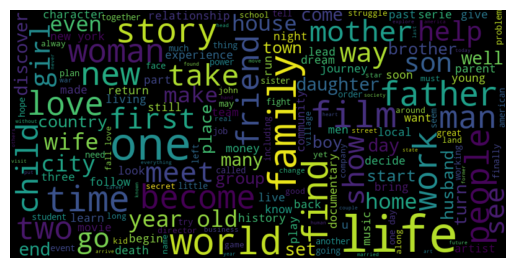

<Figure size 640x480 with 0 Axes>

In [ ]:
from wordcloud import WordCloud

# Create a corpus of all words occuring in the reviews
corpus = " ".join(review for review in data.description)

def generateWC(corpus: str, cmap: str) -> WordCloud:

    wordcloud = WordCloud(background_color = 'black', width = 800, height = 400,
                            colormap = cmap, max_words = 180, contour_width = 3,
                            max_font_size = 80, contour_color = 'steelblue',
                            random_state = 0)
    
    wordcloud.generate(corpus)

    plt.imshow(wordcloud, interpolation = 'bilinear')
    plt.axis("off")
    plt.figure()

    return wordcloud

# Generate the Word Clouds for each of the Corpuses and save them as a PNG file
generateWC(corpus = corpus, cmap = 'viridis').to_file('./visualizations/wordcloud.png')

### Label Encoding the Classes

In [14]:
def encode_labels(df: pd.Series):
    le = LabelEncoder() # Initialze the encoder
    le.fit(df) # Fitting the df
    df = le.transform(df)
    return df


In [15]:
data["genre"] = encode_labels(data["genre"])

## Saving cleaned data for model training.

In [ ]:
data.head() # Show cleaned and labeled data.

,title,genre,description
id,,,
1,Oscar et la dame rose (2009),8,listening conversation doctor parent year old ...
2,Cupid (1997),24,brother sister past incestuous relationship cu...
3,"Young, Wild and Wonderful (1980)",1,bus empty student field trip museum natural hi...
4,The Secret Sin (1915),8,help unemployed father make end meet edith twi...
5,The Unrecovered (2007),8,film title refers un recovered body ground zer...


In [ ]:
data.to_csv("./datasets/cleaned_data.csv", encoding="utf-8", index=False) # Saving cleaned data into a csv file.

In [27]:
del data # Releasing unneeded allocation.